<a href="https://colab.research.google.com/github/minjeon99/ESAA_YB/blob/Week11/w11_fri_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **06. 차원 축소**

## **01 차원 축소(Dimension Reduction) 개요**

**차원 축소**: 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트 생성하는 것
- 다차원 데이터 세트의 문제점
  - 차원 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 증가, 희소(sparse)한 구조 가짐
  - 적은 차원에서 학습된 모델보다 예측 신뢰도 떨어짐,
  
    선형 모델에서는 입력 변수 간의 상관관계 높을 경우 다중 공선성 문제로 예측 성능 저하
- 3차원 이하의 차원 축소 -> 시각적으로 데이터 압축해 표현 가능, 학습에 필요한 처리 능력 감소
- 피처 선택, 피처 추출
  - 피처 선택(feature selection): 종속성 강한 불필요한 피처 제거, 주요 피처만 선택
  - 피처 추출: 기존 피처를 저차원의 중요 피처로 압축해서 추출 => 기존 피처와는 완전히 다른 값
- 차원 축소 알고리즘: PCA, SVD, NMF
  - 이미지, 텍스트에 자주 사용
  - 변환된 이미지는 원본 이미지보다 훨씬 적은 차원이므로 과적합 영향력 작아져서 예측 성능 향상
  - 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱(Semantic), 토픽(Topic)을 잠재 요소로 간주하고 찾아낼 수 있음

## **PCA(Principal Component Analysis)**

### **PCA 개요**

여러 변수 간에 존재하는 상관관계를 이용해 대표하는 주성분(Principal Component)을 추출해 차원 축소하는 기법
- 기존 데이터의 정보 유실이 최소화돼야 함

  => **가장 높은 분산**을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소 = **PCA의 주성분**

**2개 피처 데이터 세트 차원 축소하기**
- 키, 몸무게 2개의 피처를 한 개의 주성분 가진 데이터 세트로 차원 축소
- 데이터 변동성이 가장 큰 방향으로 축 설정 -> 새롭게 생성된 축으로 데이터 투영

  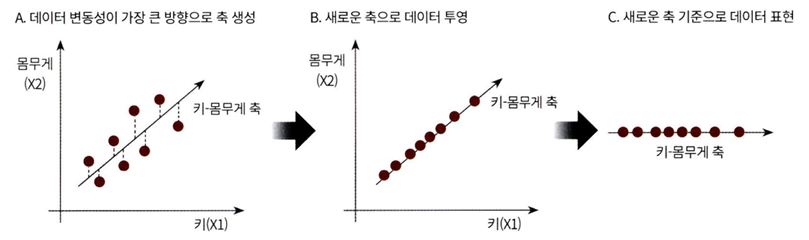

- 첫 번째 벡터 축: 가장 큰 데이터 변동성(Variance) 기반으로 설정

  -> 두 번째 축: 첫 번째 벡터 축의 직교 벡터 -> 세 번째 축: 두 번째 축의 직교 벡터

    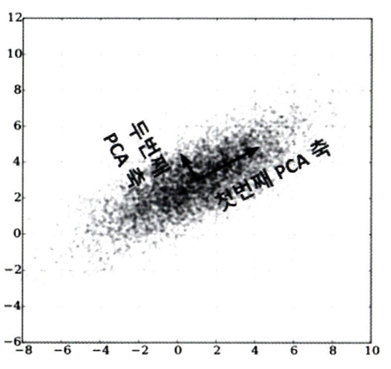

PCA 분석은 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법

**선형대수 관점에서의 해석**
- 입력 데이터의 **공분산 행렬(Covariance Matrix)**을 고유값 분해 -> 구한 고유벡터에 입력 데이터를 선형 변환
- **고유벡터** = **PCA의 주성분 벡터**, 입력 데이터의 분산이 큰 방향 나타냄
- **고윳값(eigenvalue)**: 고유벡터의 크기 = 입력 데이터의 분산
---
**선형 변환**

: 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것
  
특정 벡터를 하나의 공간에서 다른 공간으로 투영햐는 개념으로도 볼 수 있음, 이 경우 행렬=공간으로 가정

**공분산**
- 분산: 한 개의 특정한 변수의 데이터 변동
- 공분산: 두 변수 간의 변동
  - Cov(X, Y) > 0 => X가 증가할 때 Y도 증가한다
- 공분산 행렬: 여러 변수와 관련된 공분산을 포함하는 정방형 행렬

  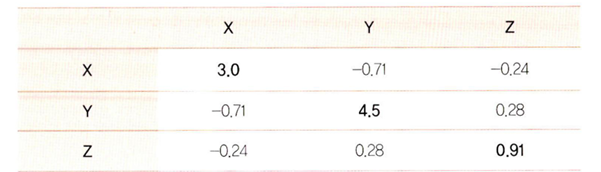
  - 대각선 원소: 각 변수의 분산
  - 대각선 이외 원소: 가능한 모든 변수 쌍 간의 공분산
- 고유벡터: 행렬 A를 곱해도 방향이 변하지 않고 크기만 변하는 벡터
  - Ax = ax (A: 행렬, x: 고유벡터, a: 스칼라값)
  - 여러 개가 존재, 정방 행렬은 최대 그 차원 수만큼 가질 수 있음
  - 행렬이 작용하는 힘의 방향과 관계 있어서 행렬 분해하는 데 사용
- 공분산 행렬은 정방행렬(Diagonal Matrix), 대칭행렬(Symmetric Matrix)
  - 대칭행렬은 항상 고유벡터를 직교행렬로, 고유값을 정방 행렬로 대각화할 수 있음
- 입력 데이터의 공분산 행렬(C)를 공분산 행렬의 특성으로 인해 다음과 같이 분해
$$C=P∑P^T$$
  - P: nxn 직교 행렬
  - ∑: nxn 정방행렬
  - $P^T$: P의 전치행렬
  - 고유벡터 행렬과 고유값 행렬로 다음과 같이 대응

    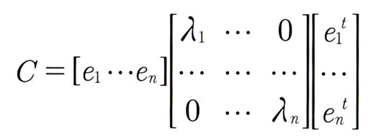

=> 공분산 C는 고유벡터 직교 행렬 * 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치 행렬로 분해
- PCA는 **입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해**될 수 있으며, **분해된 고유벡터를 이용해 입력 데이터를 선형 변환**하는 방식

**PCA 과정**
1. 입력 데이터 세트와 공분산 행렬을 생성
2. 공분산 행렬의 고유벡터와 고유값 계산
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수)만큼 고유벡터 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


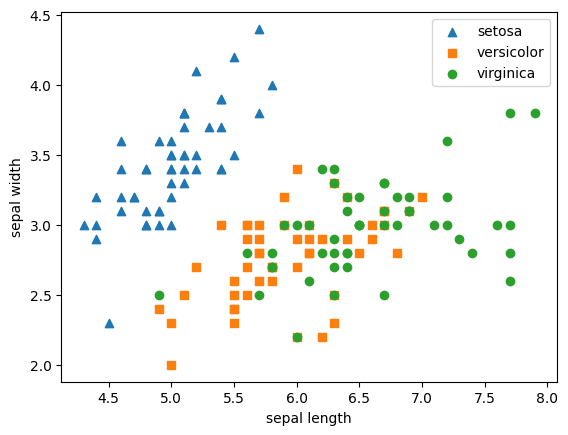

In [2]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [5]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


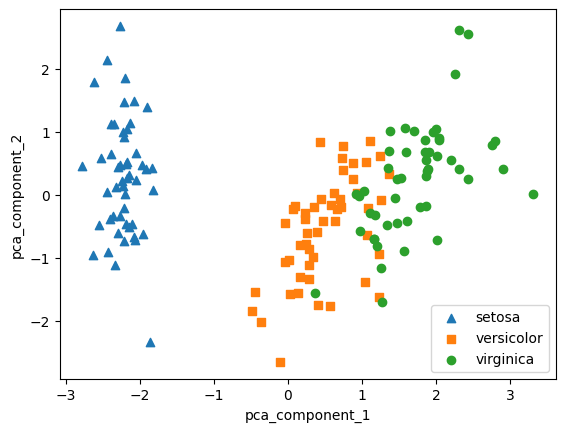

In [6]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행.
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [7]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [9]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


**신용카드 고객 데이터 세트**

In [2]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('/content/default of credit card clients.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [3]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

<Axes: >

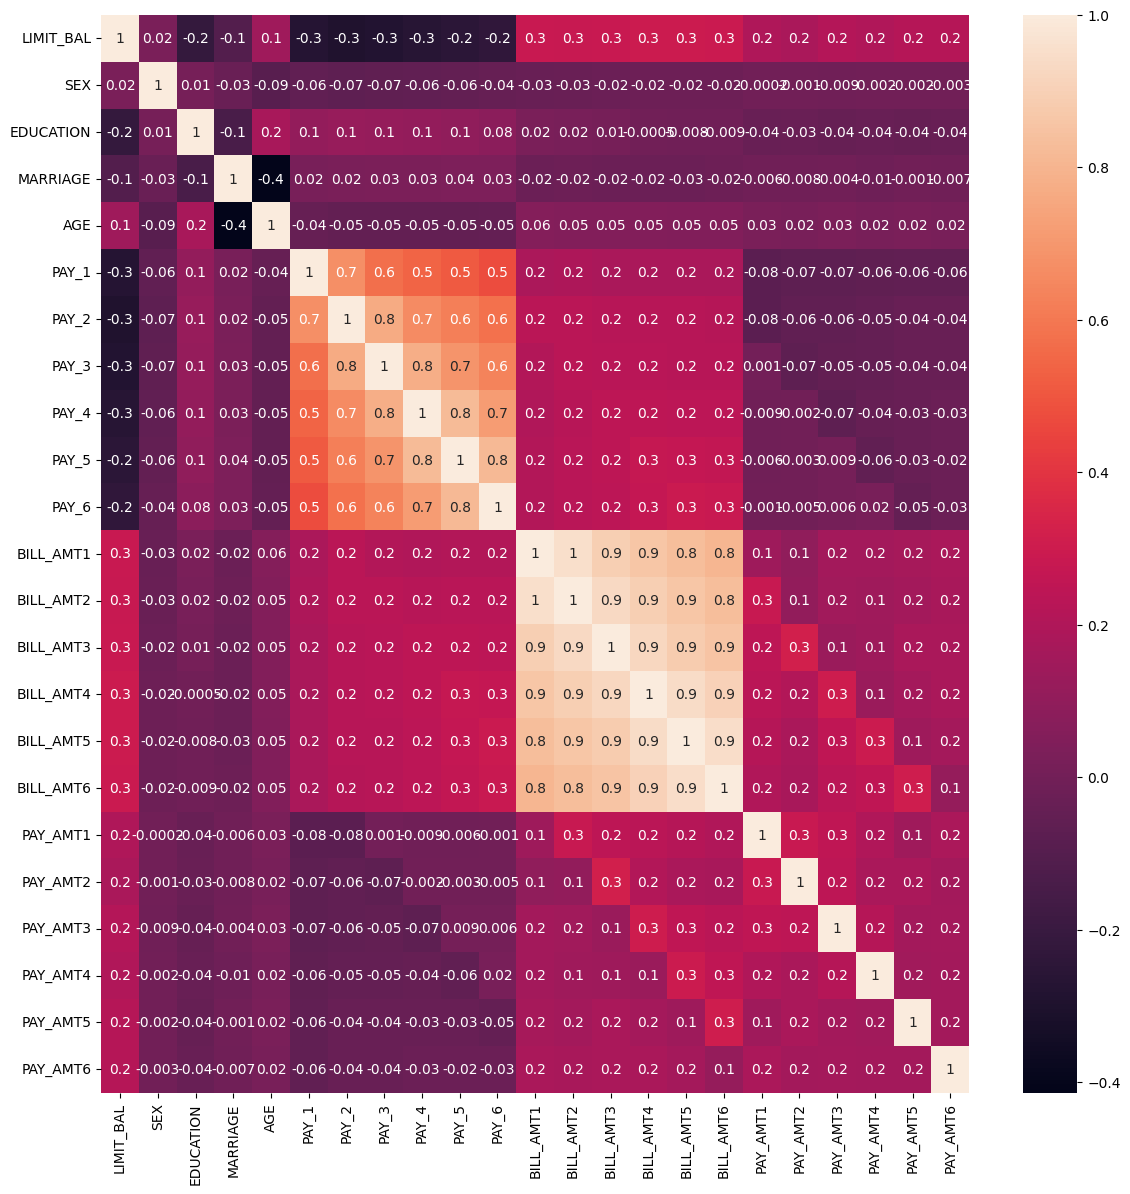

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [6]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행.
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7916 0.7963 0.8032]
PCA 변환 데이터 셋 평균 정확도:0.7970


## **03 LDA(Linear Discriminant Analysis)**

### **LDA 개요**

LDA은 선형 판별 분석법으로 불림
- PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원 축소하는 기법
- 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하며 차원 축소
  - 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음
- 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원 축소
  - 클래스 간 분산은 크게 가져가고, 클래스 내부 분산은 최대한 작게 가져감

  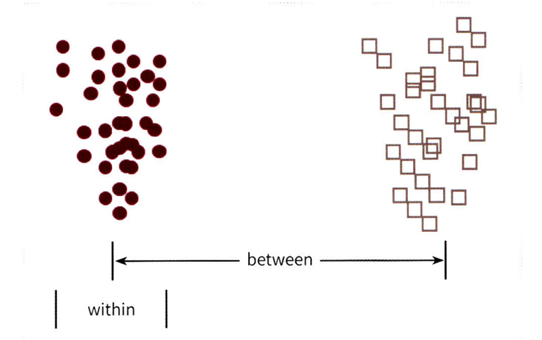

**LDA 과정**
1. 클래스 내부와 클래스 간 분산 행렬 구하기. 두 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구함
2. $S_W$: 클래스 내부 분산 행렬, $S_B$: 클래스 간 분산행렬
  - 두 행렬을 고유벡터로 분해

  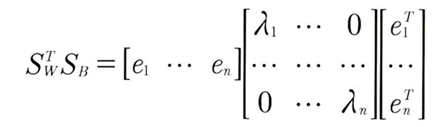
3. 고유값이 가장 큰 순으로 K개(LDA 변환 차수)만큼 추출
4. 고유값이 가장 큰 순은로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

### **붓꽃 데이터 세트에 LDA 적용하기**

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [9]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


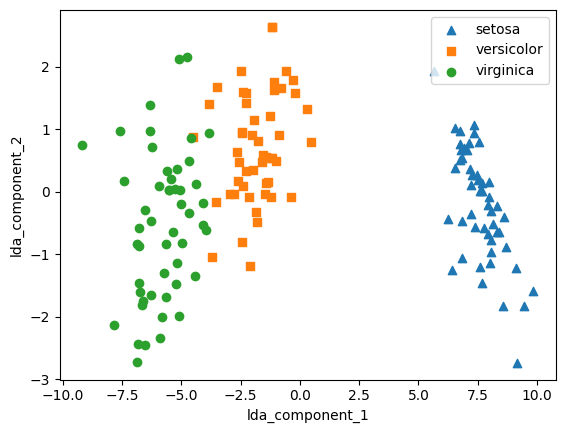

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()